In [11]:
from py2cytoscape import cyrest
import pandas as pd

%run utils/cyto_to_shapely_node_util.ipynb
%run utils/cyto_to_shapely_edge_util.ipynb
%run utils/full_cyto_to_shapely_util.ipynb
%run utils/network_score_util.ipynb

BASE_URL = 'http://localhost:1234/v1/'
cy = cyrest.cyclient()

MIN_PARAMETER_VALUE = -50000
MAX_PARAMETER_VALUE = 50000
STEP = 1000

X_LIM_RANGE_MAX = 3500
Y_LIM_RANGE_MAX = 1000

In [12]:
#Set up
network_suid = str(cy.network.get_attribute(
    columnList='SUID',
    network='CURRENT'
)[0]['SUID'])
view_suid = str(requests.get(BASE_URL + 'networks/views/currentNetworkView').json()['data']['networkViewSUID'])

dataframe = pd.DataFrame()
data = []

-50000
-49000
-48000
-47000
-46000
-45000
-44000
-43000
-42000
-41000
-40000
-39000
-38000
-37000
-36000
-35000
-34000
-33000
-32000
-31000
-30000
-29000
-28000
-27000
-26000
-25000
-24000
-23000
-22000
-21000
-20000
-19000
-18000
-17000
-16000
-15000
-14000
-13000
-12000
-11000
-10000
-9000
-8000
-7000
-6000
-5000
-4000
-3000
-2000
-1000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


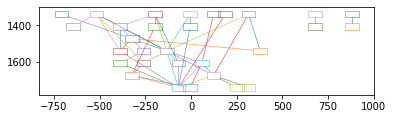

In [13]:
#Apply new layout to network and get new score
for i in range(MIN_PARAMETER_VALUE, MAX_PARAMETER_VALUE + 1, STEP):
    if i % 20 == 0:
        print(i)
    cy.layout.hierarchical(network='SUID:' + str(network_suid), bandGap=str(i))
    new_data = network_score(
        network_suid, 
        view_suid, 
        X_LIM_RANGE_MAX,
        Y_LIM_RANGE_MAX,
        edge_direction='up'
    )
    data.append([i] + new_data)

In [14]:
dataframe = dataframe.append(data)
dataframe.columns = ['HorizontalSpacing', 
                                  'EdgeCrossings', 
                                  'NodeOverlaps',
                                  'NodeEdgeOverlaps',
                                  'EdgeLength', 
                                  'NodeDistance', 
                                  'NodeEdgeDistance', 
                                  'DownwardEdge']
dataframe.to_csv()

',HorizontalSpacing,EdgeCrossings,NodeOverlaps,NodeEdgeOverlaps,EdgeLength,NodeDistance,NodeEdgeDistance,DownwardEdge\n0,-50000,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.01608248086363495,0.011924800730282962,0.9148936170212766\n1,-49000,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.01608248086363495,0.011924800730282962,0.9148936170212766\n2,-48000,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.01608248086363495,0.011924800730282962,0.9148936170212766\n3,-47000,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.01608248086363495,0.011924800730282962,0.9148936170212766\n4,-46000,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.01608248086363495,0.011924800730282962,0.9148936170212766\n5,-45000,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.01608248086363495,0.011924800730282962,0.9148936170212766\n6,-44000,0.958371